# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = ['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | colonia
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | usinsk
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | kapa'a
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | undurkhaan
Processing Record 13 of Set 1 | timbuktu
Processing Record 14 of Set 1 | as sulayyil
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | goba
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | mana
Processing Record 19 of Set 1 | tuy hoa
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | suva
Processing Record 22 of Set 1 | paracuru
Processing Record 23 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,288.05,77,100,1.79,NZ,[dt]
1,colonia,50.9333,6.9500,282.45,81,40,5.14,DE,[dt]
2,avarua,-21.2078,-159.7750,301.18,69,100,6.69,CK,[dt]
3,usinsk,65.9939,57.5281,262.66,95,97,5.26,RU,[dt]
4,adamstown,-25.0660,-130.1015,297.72,68,100,0.61,PN,[dt]


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,281.28,91,100,17.17,TF,['dt']
1,kristiansund,63.1115,7.7320,277.51,87,100,6.17,NO,['dt']
2,codrington,-38.2667,141.9667,290.98,59,87,8.73,AU,['dt']
3,invercargill,-46.4000,168.3500,288.16,83,100,2.68,NZ,['dt']
4,sinazongwe,-17.2614,27.4618,297.02,87,100,2.02,ZM,['dt']


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

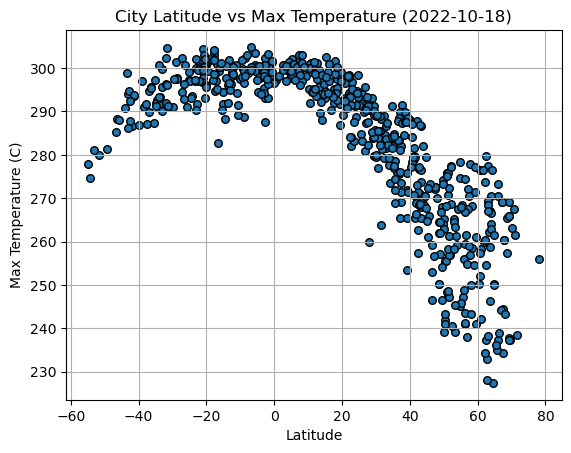

In [8]:
# Build scatter plot for latitude vs. temperature
scatter1 = city_data_df.plot.scatter(x=["Lat"],y=["Max Temp"],
                                     marker="o", facecolors="blue", 
                                     edgecolors="black",s=30)

# Incorporate the other graph properties
scatter1.set_xlabel("Latitude")
scatter1.set_ylabel("Max Temperature (C)")
scatter1.set_title("City Latitude vs Max Temperature (2022-10-18)")
scatter1.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

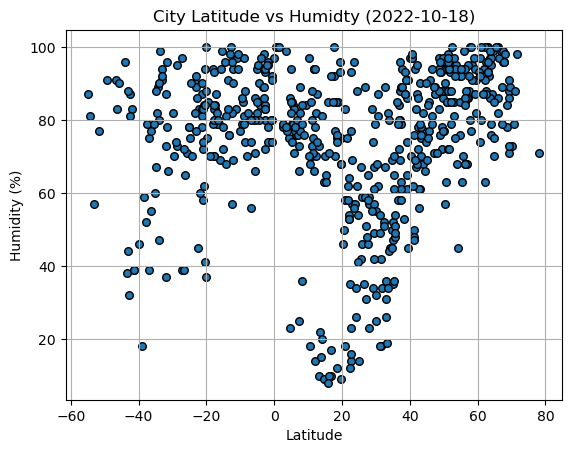

In [9]:
# Build the scatter plots for latitude vs. humidity
scatter2 = city_data_df.plot.scatter(x=["Lat"],y=["Humidity"],
                                     marker="o", facecolors="blue", 
                                     edgecolors="black",s=30)

# Incorporate the other graph properties
scatter2.set_xlabel("Latitude")
scatter2.set_ylabel("Humidity (%)")
scatter2.set_title("City Latitude vs Humidty (2022-10-18)")
scatter2.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

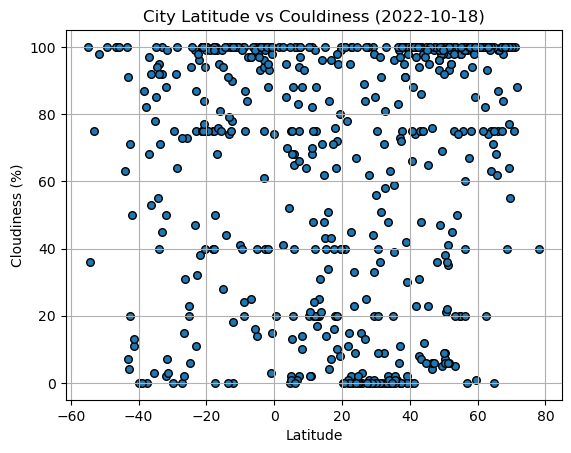

In [10]:
# Build the scatter plots for latitude vs. cloudiness
scatter3 = city_data_df.plot.scatter(x=["Lat"],y=["Cloudiness"],
                                     marker="o", facecolors="blue", 
                                     edgecolors="black",s=30)

# Incorporate the other graph properties
scatter3.set_xlabel("Latitude")
scatter3.set_ylabel("Cloudiness (%)")
scatter3.set_title("City Latitude vs Couldiness (2022-10-18)")
scatter3.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

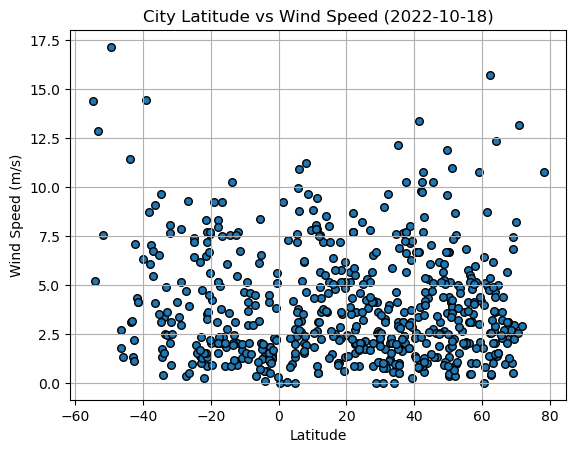

In [11]:
# Build the scatter plots for latitude vs. wind speed
scatter4 = city_data_df.plot.scatter(x=["Lat"],y=["Wind Speed"],
                                     marker="o", facecolors="blue", 
                                     edgecolors="black",s=30)

# Incorporate the other graph properties
scatter4.set_xlabel("Latitude")
scatter4.set_ylabel("Wind Speed (m/s)")
scatter4.set_title("City Latitude vs Wind Speed (2022-10-18)")
scatter4.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Lng']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kristiansund,63.1115,7.7320,277.51,87,100,6.17,NO,['dt']
5,vilyuchinsk,52.9306,158.4028,265.30,85,100,3.24,RU,['dt']
8,ribeira grande,38.5167,-28.7000,288.02,87,91,1.79,PT,['dt']
10,petropavlovsk-kamchatsky,53.0452,158.6483,264.48,81,75,5.00,RU,['dt']
11,umea,63.8284,20.2597,264.11,79,75,4.63,SE,['dt']


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,281.28,91,100,17.17,TF,['dt']
2,codrington,-38.2667,141.9667,290.98,59,87,8.73,AU,['dt']
3,invercargill,-46.4000,168.3500,288.16,83,100,2.68,NZ,['dt']
4,sinazongwe,-17.2614,27.4618,297.02,87,100,2.02,ZM,['dt']
6,waitangi,-43.9535,-176.5597,290.83,96,63,11.43,NZ,['dt']


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7337920523334309


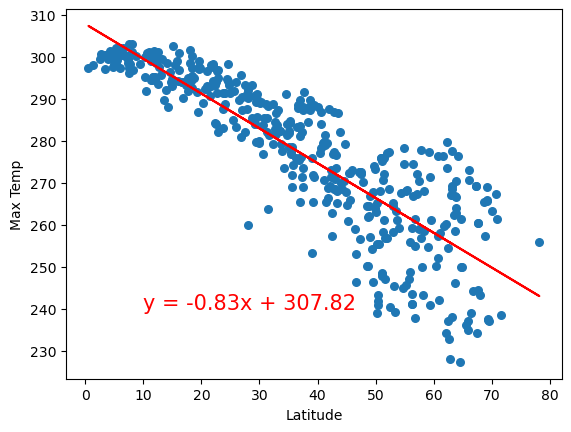

In [21]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

scatter5 = northern_hemi_df.plot.scatter(x=["Lat"],y=["Max Temp"],
                                     marker="o", facecolors="blue", 
                                     s=30)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.31415571878937815


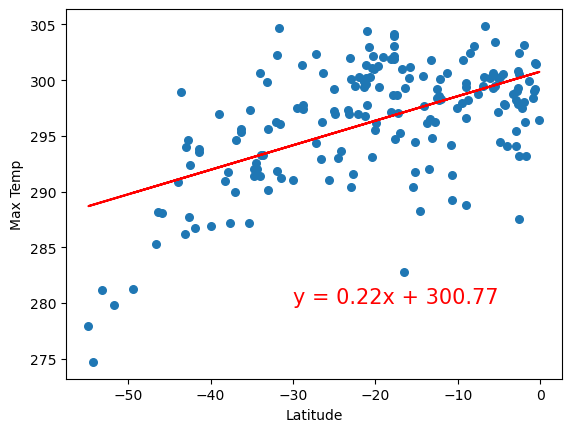

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

scatter6 = southern_hemi_df.plot.scatter(x=["Lat"],y=["Max Temp"],
                                     marker="o", facecolors="blue", 
                                     s=30)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,280),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The futher from the equator, the lower the max temperature is.  The northern hemisphere has a lower max temp than the southern hempisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1653347970859102


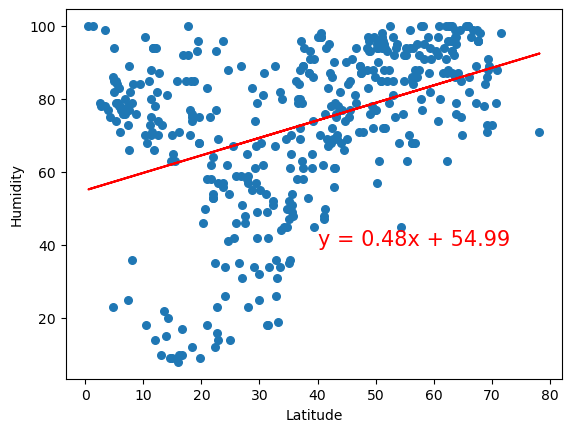

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

scatter7 = northern_hemi_df.plot.scatter(x=["Lat"],y=["Humidity"],
                                     marker="o", facecolors="blue", 
                                     s=30)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.10809944764679452


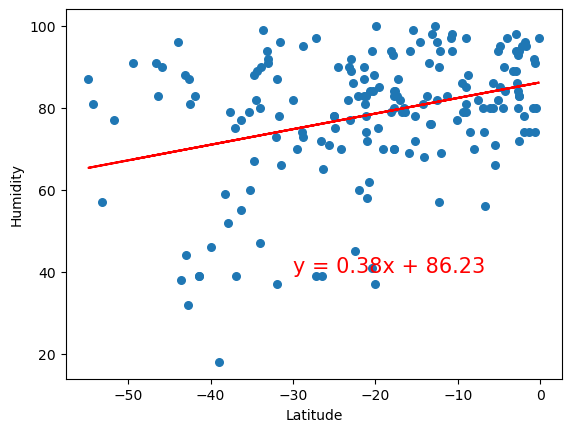

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

scatter8 = southern_hemi_df.plot.scatter(x=["Lat"],y=["Humidity"],
                                     marker="o", facecolors="blue", 
                                     s=30)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Himidity range is about the same in both the norther and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11640506622820314


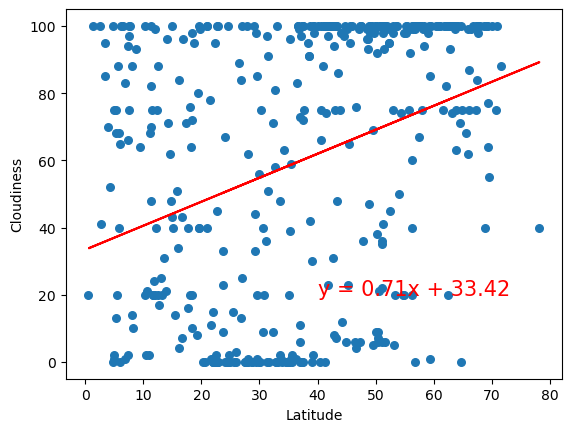

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

scatter9 = northern_hemi_df.plot.scatter(x=["Lat"],y=["Cloudiness"],
                                     marker="o", facecolors="blue", 
                                     s=30)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04266279208704367


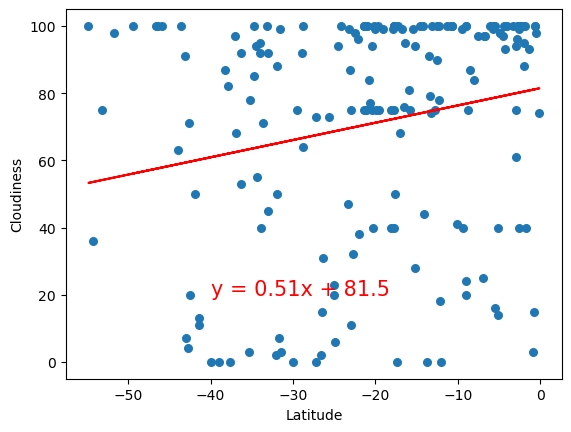

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

scatter10 = southern_hemi_df.plot.scatter(x=["Lat"],y=["Cloudiness"],
                                     marker="o", facecolors="blue", 
                                     s=30)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Coludiness range in the northern hemisphere is greater than in the southern hemisphere.  It increases as you increase in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0012619257486158855


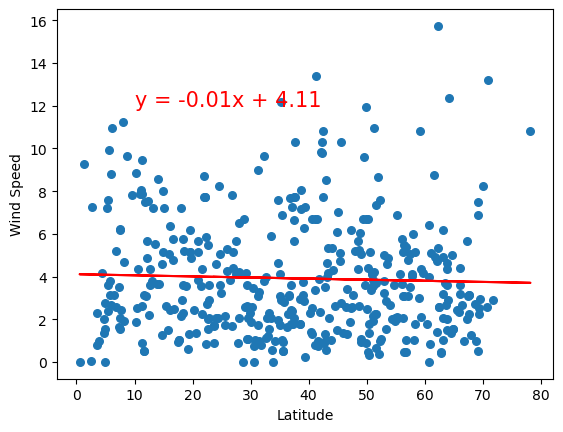

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

scatter11 = northern_hemi_df.plot.scatter(x=["Lat"],y=["Wind Speed"],
                                     marker="o", facecolors="blue", 
                                     s=30)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1469993972699545


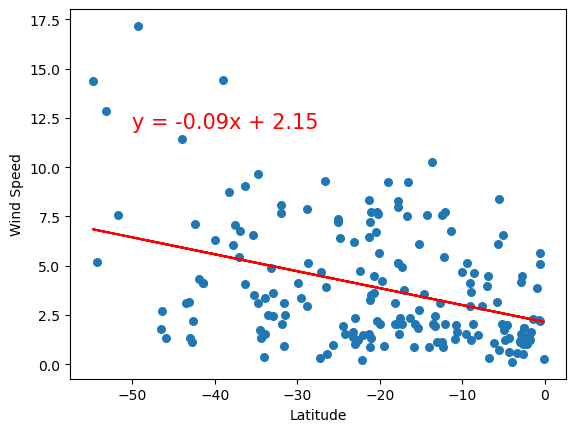

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

scatter12 = southern_hemi_df.plot.scatter(x=["Lat"],y=["Wind Speed"],
                                     marker="o", facecolors="blue", 
                                     s=30)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Wind speed range does not vary much in the northern hemisphere and tends to increase the further down you go in the southern hemisphere